In [14]:
import pandas as pd

In [15]:
df = pd.read_csv("C:\\Users\\Chamuditha\\Downloads\\NIPS_papers\\papers.csv")
df.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [16]:
#dropping id, event_type, and pdf name columns
df = df.drop(columns = ['id', 'event_type', 'pdf_name'], axis = 1)

In [17]:
df.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [18]:
#Removing punctuations
#importing regular expression library
import re

In [19]:
#creating new field name to store the text after removing punctuations
df['clean_text'] = df['paper_text'].map(lambda x: re.sub('[,\\.!?]', '', x))

In [20]:
df['clean_text']

0       767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1       683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2       394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3       Bayesian Query Construction for Neural\nNetwor...
4       Neural Network Ensembles Cross\nValidation and...
                              ...                        
7236    Single Transistor Learning Synapses\n\nPaul Ha...
7237    Bias Variance and the Combination of\nLeast Sq...
7238    A Real Time Clustering CMOS\nNeural Engine\nT ...
7239    Learning direction in global motion: two\nclas...
7240    Correlation and Interpolation Networks for\nRe...
Name: clean_text, Length: 7241, dtype: object

In [21]:
#removing digits in the clean_text
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub('\\w*\\d\\w*', '', x))

In [22]:
df['clean_text']

0       \n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABASE\...
1       \n\nA MEAN FIELD THEORY OF LAYER IV OF VISUAL ...
2       \n\nSTORING COVARIANCE BY THE ASSOCIATIVE\nLON...
3       Bayesian Query Construction for Neural\nNetwor...
4       Neural Network Ensembles Cross\nValidation and...
                              ...                        
7236    Single Transistor Learning Synapses\n\nPaul Ha...
7237    Bias Variance and the Combination of\nLeast Sq...
7238    A Real Time Clustering CMOS\nNeural Engine\nT ...
7239    Learning direction in global motion: two\nclas...
7240    Correlation and Interpolation Networks for\nRe...
Name: clean_text, Length: 7241, dtype: object

In [23]:
#converting all content into lowercase
df['clean_text'] = df['clean_text'].map(lambda x: x.lower())

In [24]:
df['clean_text']

0       \n\nself-organization of associative database\...
1       \n\na mean field theory of layer iv of visual ...
2       \n\nstoring covariance by the associative\nlon...
3       bayesian query construction for neural\nnetwor...
4       neural network ensembles cross\nvalidation and...
                              ...                        
7236    single transistor learning synapses\n\npaul ha...
7237    bias variance and the combination of\nleast sq...
7238    a real time clustering cmos\nneural engine\nt ...
7239    learning direction in global motion: two\nclas...
7240    correlation and interpolation networks for\nre...
Name: clean_text, Length: 7241, dtype: object

In [25]:
#creating the word cloud 

#importing the wordcloud library
from wordcloud import WordCloud

def create_word_cloud(target_df, column_name):
  print("Joining all words into long text;")

  #joins all the values into a single string using a comma
  full_text = ','.join(list(target_df[column_name].values)) 
  
  wordcloud = WordCloud(background_color = 'black', 
                         max_words = 100, 
                         contour_width = 2,
                         contour_color = 'yellow')
  
  print("Creating word cloud;")
  wordcloud.generate(full_text)

  return wordcloud


Joining all words into long text;
Creating word cloud;


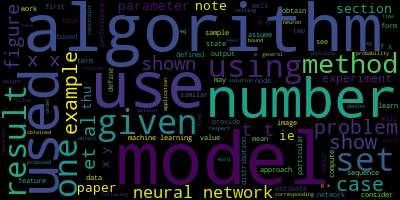

In [26]:
wordcloud = create_word_cloud(df, 'clean_text')
wordcloud.to_image()

In [27]:
#creating doucument term matrix (DTM)

#importing count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

def create_document_term_matrix(dataframe, column_name):

  #CountVectorizer converts text data into a DTM
  cv = CountVectorizer(analyzer = 'word') #analysis should be done at the word level
  
  #tokenizes the text pass it into a sparse matrix (word --> frequency)
  data = cv.fit_transform(dataframe[column_name])

  df_dtm = pd.DataFrame(data.toarray(),  #converts sparse matrix into a 2D array
                        columns = cv.get_feature_names_out()) #assign the words as columns in DTM
  df_dtm.index = dataframe.index

  return df_dtm

In [28]:
df_dtm = create_document_term_matrix(df, 'clean_text')

In [29]:
df_dtm

,__,___,____,_____,______,_______,________,_________,__________,___________,...,zzrln,zzs,zzt,zztix,zzu,zzwi,zzx,zzyy,zzz,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#removing stop words

import gensim
from gensim.utils import simple_preprocess
import nltk

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chamuditha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords

In [33]:
stop_words = stopwords.words('english')
stop_words.extend(['has', 'been', 're', 'com', 'edu', 'use']) #adding more words as stopwords

In [34]:
def convert_sentence_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), #tokenize each sentence by breaking into words
                                             deacc = True)) #remove punctuation marks
                                                            #and remove accent marks

In [35]:
#creating function to remove stopwords
def remove_all_stop_words(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [36]:
#converting all the values into a list
text_to_list = df.clean_text.values.tolist()

In [37]:
#now every record in the dataset are sentences
len(text_to_list)

7241

In [38]:
text_to_list[0]

'\n\nself-organization of associative database\nand its applications\nhisashi suzuki and suguru arimoto\nosaka university toyonaka osaka  japan\nabstract\nan efficient method of self-organizing associative databases is proposed together with\napplications to robot eyesight systems the proposed databases can associate any input\nwith some output in the first half part of discussion an algorithm of self-organization is\nproposed from an aspect of hardware it produces a new style of neural network in the\nlatter half part an applicability to handwritten letter recognition and that to an autonomous\nmobile robot system are demonstrated\n\nintroduction\nlet a mapping f : x -+ y be given here x is a finite or infinite set and y is another\nfinite or infinite set a learning machine observes any set of pairs (x y) sampled randomly\nfrom x x y (x x y means the cartesian product of x and y) and it computes some\nestimate j : x -+ y of f to make small the estimation error in some measure\nusually

In [39]:
text_as_words = list(convert_sentence_to_words(text_to_list))

In [40]:
len(text_as_words)

7241

In [41]:
print(text_as_words[0])

['self', 'organization', 'of', 'associative', 'database', 'and', 'its', 'applications', 'hisashi', 'suzuki', 'and', 'suguru', 'arimoto', 'osaka', 'university', 'toyonaka', 'osaka', 'japan', 'abstract', 'an', 'efficient', 'method', 'of', 'self', 'organizing', 'associative', 'databases', 'is', 'proposed', 'together', 'with', 'applications', 'to', 'robot', 'eyesight', 'systems', 'the', 'proposed', 'databases', 'can', 'associate', 'any', 'input', 'with', 'some', 'output', 'in', 'the', 'first', 'half', 'part', 'of', 'discussion', 'an', 'algorithm', 'of', 'self', 'organization', 'is', 'proposed', 'from', 'an', 'aspect', 'of', 'hardware', 'it', 'produces', 'new', 'style', 'of', 'neural', 'network', 'in', 'the', 'latter', 'half', 'part', 'an', 'applicability', 'to', 'handwritten', 'letter', 'recognition', 'and', 'that', 'to', 'an', 'autonomous', 'mobile', 'robot', 'system', 'are', 'demonstrated', 'introduction', 'let', 'mapping', 'be', 'given', 'here', 'is', 'finite', 'or', 'infinite', 'set', 

In [42]:
clean_words = remove_all_stop_words(text_as_words)

In [43]:
len(clean_words)

7241

In [44]:
print(clean_words[0])

['self', 'organization', 'associative', 'database', 'applications', 'hisashi', 'suzuki', 'suguru', 'arimoto', 'osaka', 'university', 'toyonaka', 'osaka', 'japan', 'abstract', 'efficient', 'method', 'self', 'organizing', 'associative', 'databases', 'proposed', 'together', 'applications', 'robot', 'eyesight', 'systems', 'proposed', 'databases', 'associate', 'input', 'output', 'first', 'half', 'part', 'discussion', 'algorithm', 'self', 'organization', 'proposed', 'aspect', 'hardware', 'produces', 'new', 'style', 'neural', 'network', 'latter', 'half', 'part', 'applicability', 'handwritten', 'letter', 'recognition', 'autonomous', 'mobile', 'robot', 'system', 'demonstrated', 'introduction', 'let', 'mapping', 'given', 'finite', 'infinite', 'set', 'another', 'finite', 'infinite', 'set', 'learning', 'machine', 'observes', 'set', 'pairs', 'sampled', 'randomly', 'means', 'cartesian', 'product', 'computes', 'estimate', 'make', 'small', 'estimation', 'error', 'measure', 'usually', 'say', 'faster', 

In [45]:
#creating bigrams and trigrmas from tokenized text using gensim's Phrases model

     #bigram will only be considered if it appears at leat 5 times in the corpus
bigram = gensim.models.Phrases(clean_words, min_count = 5, 
                               threshold = 100) 
trigram = gensim.models.Phrases(bigram[clean_words], #detects bigrams within the text and combines them into a single word
                                                     #(ex: data science --> data_science) and pass it through another gensim's Phrase
                                threshold = 100)

In [46]:
#threshold = 100 --> how frequently word pairs must occur together to be considered as a bigram

In [47]:
#creating bigram and trigram models
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [48]:
#creating functions to create bigrams and trigrams
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigram(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [49]:
#lemmatization
def lemmatization(texts, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV']): #tags that are allowed to be lemmatized
    texts_out = []    #creating a empty list to store lemmatized sentences  
    
    for sent in texts:  #loops through each doc
        doc = nlp(" ".join(sent))   #npl() tokenizes the sentence and assigns postags to each word
        
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        #extract the base form of each word if the postags of each word in allowed_postags
   
    return texts_out
    

In [50]:
#importing spacy library
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [51]:
#form bigrams 
clean_words_bigrams = make_bigrams(clean_words)

In [52]:
print(clean_words_bigrams[0])

['self_organization', 'associative', 'database', 'applications', 'hisashi', 'suzuki', 'suguru', 'arimoto', 'osaka', 'university', 'toyonaka', 'osaka_japan', 'abstract', 'efficient', 'method', 'self_organizing', 'associative', 'databases', 'proposed', 'together', 'applications', 'robot', 'eyesight', 'systems', 'proposed', 'databases', 'associate', 'input', 'output', 'first', 'half', 'part', 'discussion', 'algorithm', 'self_organization', 'proposed', 'aspect', 'hardware', 'produces', 'new', 'style', 'neural', 'network', 'latter', 'half', 'part', 'applicability', 'handwritten', 'letter', 'recognition', 'autonomous_mobile', 'robot', 'system', 'demonstrated', 'introduction', 'let', 'mapping', 'given', 'finite', 'infinite', 'set', 'another', 'finite', 'infinite', 'set', 'learning', 'machine', 'observes', 'set', 'pairs', 'sampled', 'randomly', 'means', 'cartesian_product', 'computes', 'estimate', 'make', 'small', 'estimation', 'error', 'measure', 'usually', 'say', 'faster', 'decrease', 'estim

In [53]:
#form trigrams
clean_words_trigrams = make_trigram(clean_words_bigrams)

In [54]:
#do lemmatization on bigrams by keeping only noun, adj, verb, adv
clean_words_lemmatized = lemmatization(clean_words_trigrams, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV'])

In [55]:
print(clean_words_lemmatized[0])

['self_organization', 'associative', 'database', 'application', 'toyonaka', 'osaka_japan', 'abstract', 'efficient', 'method', 'self_organize', 'associative', 'database', 'propose', 'together', 'application', 'robot', 'system', 'propose', 'database', 'associate', 'input', 'output', 'first', 'half', 'part', 'discussion', 'self_organization', 'propose', 'aspect', 'hardware', 'produce', 'new', 'style', 'neural', 'network', 'latter', 'half', 'part', 'applicability', 'handwritten', 'letter', 'robot', 'system', 'demonstrate', 'introduction', 'let', 'mapping', 'give', 'finite', 'infinite', 'set', 'finite', 'infinite', 'set', 'learn', 'machine', 'observe', 'set', 'pair', 'sample', 'randomly', 'mean', 'cartesian_product', 'compute', 'estimate', 'make', 'small', 'estimation', 'error', 'measure', 'usually', 'say', 'fast', 'decrease', 'estimation', 'error', 'increase', 'number', 'sample', 'well', 'learn', 'machine', 'however', 'expression', 'performance', 'incomplete', 'lack', 'consideration', 'can

In [56]:
print(len(clean_words))
print(len(clean_words[0]))
print(len(clean_words[7240]))

7241
1816
1954


In [57]:
print(len(clean_words_lemmatized))
print(len(clean_words_lemmatized[0]))
print(len(clean_words_lemmatized[7240]))

7241
1527
1727


In [58]:
#tokenization (converting each word into a vector)
import gensim.corpora as corpora

In [59]:
#create a dictionary from preprocessed words to map them to a unique ID
id2word = corpora.Dictionary(clean_words_lemmatized)

texts = clean_words_lemmatized

corpus = [id2word.doc2bow(text) for text in texts] 
#converts lemmatized words into bag of words format {(word_ID : word_freq)}

In [60]:
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 6), (6, 2), (7, 3), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 2), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 5), (29, 3), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 6), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 13), (45, 5), (46, 1), (47, 3), (48, 2), (49, 1), (50, 2), (51, 1), (52, 4), (53, 2), (54, 1), (55, 2), (56, 2), (57, 4), (58, 1), (59, 3), (60, 9), (61, 1), (62, 1), (63, 5), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 3), (72, 11), (73, 4), (74, 1), (75, 1), (76, 7), (77, 1), (78, 1), (79, 1), (80, 1), (81, 4), (82, 1), (83, 2), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 2), (91, 2), (92, 1), (93, 2), (94, 2), (95, 2), (96, 3), (97, 2), (98, 1), (99, 1), (100, 2), (101, 1), (102, 3), (103, 1), (104, 2), (105, 1), (106, 6), (107, 1), (108, 1), (109, 1), (110, 3

In [61]:
#training the LDA model
#getting the top 5 topics
num_topics = 5

In [62]:
#using gensim lib to build the LDA model
lda_model = gensim.models.LdaMulticore(corpus = corpus, 
                                       id2word = id2word,
                                       num_topics = num_topics, 
                                       random_state = 100, 
                                       chunksize = 1, #how many docs are processed at once during training
                                       passes = 100, #how many times the model will iterate over the entire dataset
                                       )

In [63]:
print(lda_model.print_topics())

[(0, '0.026*"model" + 0.020*"image" + 0.015*"feature" + 0.013*"use" + 0.012*"learn" + 0.009*"datum" + 0.008*"object" + 0.008*"set" + 0.007*"label" + 0.007*"task"'), (1, '0.019*"model" + 0.011*"time" + 0.008*"neuron" + 0.008*"figure" + 0.007*"show" + 0.007*"signal" + 0.007*"response" + 0.007*"neural" + 0.006*"cell" + 0.006*"system"'), (2, '0.053*"network" + 0.020*"neural" + 0.020*"layer" + 0.018*"input" + 0.017*"learn" + 0.015*"training" + 0.013*"output" + 0.013*"weight" + 0.012*"use" + 0.010*"train"'), (3, '0.022*"state" + 0.017*"policy" + 0.015*"action" + 0.013*"learn" + 0.012*"time" + 0.010*"reward" + 0.010*"value" + 0.009*"agent" + 0.008*"function" + 0.007*"use"'), (4, '0.010*"function" + 0.010*"set" + 0.008*"problem" + 0.008*"use" + 0.008*"model" + 0.008*"method" + 0.007*"sample" + 0.007*"matrix" + 0.007*"distribution" + 0.007*"datum"')]


In [64]:
from pprint import pprint
pprint(lda_model.print_topics())  
#the number before each word represent the weight(contribution) of each word

[(0,
  '0.026*"model" + 0.020*"image" + 0.015*"feature" + 0.013*"use" + '
  '0.012*"learn" + 0.009*"datum" + 0.008*"object" + 0.008*"set" + '
  '0.007*"label" + 0.007*"task"'),
 (1,
  '0.019*"model" + 0.011*"time" + 0.008*"neuron" + 0.008*"figure" + '
  '0.007*"show" + 0.007*"signal" + 0.007*"response" + 0.007*"neural" + '
  '0.006*"cell" + 0.006*"system"'),
 (2,
  '0.053*"network" + 0.020*"neural" + 0.020*"layer" + 0.018*"input" + '
  '0.017*"learn" + 0.015*"training" + 0.013*"output" + 0.013*"weight" + '
  '0.012*"use" + 0.010*"train"'),
 (3,
  '0.022*"state" + 0.017*"policy" + 0.015*"action" + 0.013*"learn" + '
  '0.012*"time" + 0.010*"reward" + 0.010*"value" + 0.009*"agent" + '
  '0.008*"function" + 0.007*"use"'),
 (4,
  '0.010*"function" + 0.010*"set" + 0.008*"problem" + 0.008*"use" + '
  '0.008*"model" + 0.008*"method" + 0.007*"sample" + 0.007*"matrix" + '
  '0.007*"distribution" + 0.007*"datum"')]


In [65]:
#applies the trained LDA model to the corpus to see the topic distribution of the documents
#this shows the percentage of how it relates
doc_lda = lda_model[corpus]
print(doc_lda[0])

[(0, 0.24682325), (1, 0.16049403), (2, 0.15069787), (3, 0.1389347), (4, 0.30305013)]


In [66]:
#LDA model visualization
import pyLDAvis.gensim_models
import pyLDAvis

In [67]:
pyLDAvis.enable_notebook() #enables to view the visualization in the notebook

In [68]:
#prepare the visualization data
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

pyLDAvis.display(LDAvis_prepared)

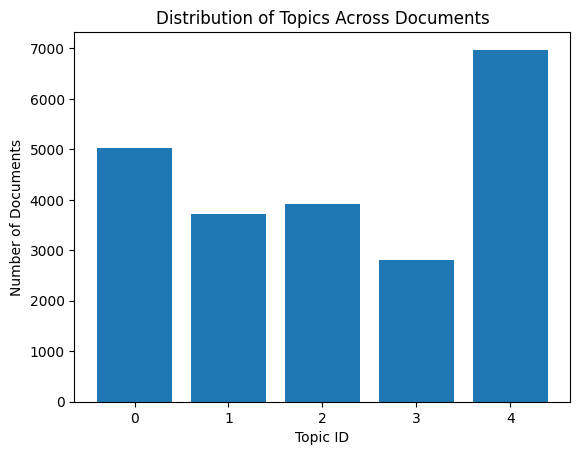

In [69]:
#visualize the model using bar plot
import matplotlib.pyplot as plt

#get the topic distributions
topic_dist = [lda_model.get_document_topics(corpus[i]) for i in range(len(corpus))]

topic_counts = [0] * num_topics   #count how many documents belong to each topic

for doc in topic_dist:
    for topic in doc:
        topic_counts[topic[0]] += 1

#creating a bar plot
plt.bar(range(num_topics), topic_counts)
plt.xlabel('Topic ID')
plt.ylabel('Number of Documents')
plt.title('Distribution of Topics Across Documents')
plt.show()


In [70]:
#check the performance matrix
#coherence score
from gensim.models import CoherenceModel

In [71]:
#create the coherence model using the LDA model to compute the coherence score
coherence_model_lda = CoherenceModel(model = lda_model, 
                                     texts = clean_words_lemmatized,
                                     dictionary = id2word, 
                                     coherence = 'c_v') #a coherence measure

In [72]:
coherence_score = coherence_model_lda.get_coherence()
print("Coherence score of the LDA model : ", coherence_score)

Coherence score of the LDA model :  0.4211258773984007


In [80]:
#calculate the Perplexity
perplexity_lda = lda_model.log_perplexity(corpus)
print('Perplexity: ', perplexity_lda)

Perplexity:  -7.634863834733896


In [74]:
#creating TF-IDF matrix
from sklearn.feature_extraction.text import TfidfVectorizer

#joining the lemmatized words into a list of strings
clean_documents = [" ".join(doc) for doc in clean_words_lemmatized]

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
tfidf_matrix = tfidf_vectorizer.fit_transform(clean_documents)

In [75]:
#using the nmf model
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(tfidf_matrix)

#extract topics
nmf_topics = nmf_model.components_

In [76]:
#coherence score of nmf model
coherence_model_nmf = CoherenceModel(topics = nmf_topics, texts = clean_words_lemmatized, dictionary = id2word, coherence = 'c_v')
coherence_nmf = coherence_model_nmf.get_coherence()
print('Coherence Score for NMF: ', coherence_nmf)

Coherence Score for NMF:  1.0
